### Pipeline

In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from sklearn import metrics
from scipy.stats import norm
import xgboost
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_auc_score

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv(r'C:\Users\Admin\MLP\DATA\Data.csv')

In [3]:
df=df.drop(['Unnamed: 0'],axis=1)

In [4]:
df.columns

Index(['FlightDate', 'Quarter', 'Year', 'Month', 'DayofMonth', 'DepTime',
       'DepDel15', 'CRSDepTime', 'DepDelayMinutes', 'OriginAirportID',
       'DestAirportID', 'ArrTime', 'CRSArrTime', 'ArrDel15', 'ArrDelayMinutes',
       'weatherCode', 'pressure', 'cloudcover', 'tempF', 'WindChillF', 'time',
       'precipMM', 'DewPointF', 'humidity', 'windspeedKmph', 'visibility',
       'WindGustKmph', 'winddirDegree', 'date', 'airport'],
      dtype='object')

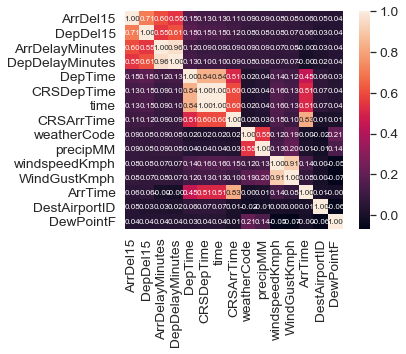

In [5]:
comat=df.corr()
k=15
col=comat.nlargest(k,'ArrDel15')['ArrDel15'].index
cm=np.corrcoef(df[col].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,annot=True,cbar=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=col.values, xticklabels=col.values)
plt.show()

In [6]:
X=df
y=df['ArrDel15']

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

In [8]:
df4=X_test

In [9]:
features=['DepDel15','WindGustKmph','DepDelayMinutes','DepTime','CRSDepTime','windspeedKmph','weatherCode',        
'precipMM','WindGustKmph','DestAirportID','DewPointF']

In [11]:
xtrain1,xtest1=X_train[features].values,X_test[features].values
ytrain,ytest=y_train.values,y_test.values

In [13]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek()
x_smt,y_smt=smt.fit_sample(xtrain1,ytrain)

In [14]:
XGB=XGBClassifier()
XGB.fit(x_smt,y_smt)
ypred5=XGB.predict(xtest1)

In [18]:
print("ACCURACY SCORE:",metrics.accuracy_score(ytest, ypred5))
print("CLASSIFICATION REPORT:\n",metrics.classification_report(ytest, ypred5))

ACCURACY SCORE: 0.9162200165277055
CLASSIFICATION REPORT:
               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95    438843
         1.0       0.89      0.69      0.78    116588

    accuracy                           0.92    555431
   macro avg       0.90      0.83      0.86    555431
weighted avg       0.91      0.92      0.91    555431



In [19]:
df4.head()

,FlightDate,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,...,time,precipMM,DewPointF,humidity,windspeedKmph,visibility,WindGustKmph,winddirDegree,date,airport
1564237,2017-06-06,2,2017,6,6,1748.0,1.0,1700,83.0,13204,...,1700,2.4,73,86,19,9,37,224,2017-06-06,MCO
1565648,2017-06-06,2,2017,6,6,1646.0,0.0,1700,0.0,11057,...,1700,0.1,59,52,7,10,8,221,2017-06-06,CLT
311088,2016-02-23,1,2016,2,23,1400.0,0.0,1400,0.0,14771,...,1400,0.0,42,42,9,10,13,52,2016-02-23,SFO
1166999,2017-12-20,4,2017,12,20,1423.0,1.0,1300,117.0,10397,...,1300,0.0,62,95,14,5,32,234,2017-12-20,ATL
448435,2016-03-12,1,2016,3,12,1459.0,0.0,1500,0.0,11618,...,1500,0.0,40,54,15,10,18,208,2016-03-12,EWR


In [20]:
df4["Delay"]=ypred5

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df4.shape

(555431, 31)

In [22]:
df4=df4[df4.Delay==1]

In [23]:
df4.shape

(90864, 31)

In [24]:
df4.columns

Index(['FlightDate', 'Quarter', 'Year', 'Month', 'DayofMonth', 'DepTime',
       'DepDel15', 'CRSDepTime', 'DepDelayMinutes', 'OriginAirportID',
       'DestAirportID', 'ArrTime', 'CRSArrTime', 'ArrDel15', 'ArrDelayMinutes',
       'weatherCode', 'pressure', 'cloudcover', 'tempF', 'WindChillF', 'time',
       'precipMM', 'DewPointF', 'humidity', 'windspeedKmph', 'visibility',
       'WindGustKmph', 'winddirDegree', 'date', 'airport', 'Delay'],
      dtype='object')

In [32]:
X1=df4[features].values
y1=df4['ArrDelayMinutes'].values

In [33]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.30)

In [34]:
from xgboost import XGBRegressor
XGB1=XGBRegressor()

In [35]:
XGB1.fit(X1_train,y1_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:
pred=XGB1.predict(X1_test)

In [39]:
from math import sqrt
print("MEAN ABSOLUTE ERROR:",metrics.mean_absolute_error(pred,y1_test))
print("ROOT MEAN SQUARE ERROR:",sqrt(metrics.mean_squared_error(pred,y1_test)))
print("R2_SCORE:",metrics.r2_score(y1_test,pred))

MEAN ABSOLUTE ERROR: 13.104605982114267
ROOT MEAN SQUARE ERROR: 18.575631458604523
R2_SCORE: 0.9448814038778951
